# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/data_cleaned.csv')
df.head()

,Unnamed: 0,neo,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,0,N,N,3.40,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,1,N,N,4.20,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,2,N,N,5.33,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,3,N,N,3.00,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,4,N,N,6.90,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [3]:
df.describe()

,Unnamed: 0,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,932335.000000,932335.000000,9.323350e+05,932335.000000,9.323350e+05,932335.000000,932335.000000,932335.000000,932335.000000,932335.000000,...,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05
mean,473165.568655,16.890009,2.458895e+06,58894.728019,2.019763e+07,0.156221,2.932576,2.398889,8.996685,168.395504,...,1.980729e+01,9.920530e-01,4.104756e+00,4.305258e+05,4.304413e+05,2.120456e+01,2.471471e-02,1.281599e+08,8.559499e+04,5.669526e-01
std,277616.874797,1.801243,6.439097e+02,643.909665,1.775660e+04,0.093001,36.458214,2.165155,6.606939,102.863983,...,2.913524e+03,1.284591e+02,1.337408e+03,7.330317e+07,7.329691e+07,7.221158e+03,9.820940e+00,2.194193e+10,2.776960e+07,2.783500e+00
min,0.000000,-1.100000,2.425052e+06,25051.000000,1.927062e+07,0.000003,0.555418,0.070511,0.007744,0.000025,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,3.292200e-11
25%,233084.500000,16.000000,2.459000e+06,59000.000000,2.020053e+07,0.092159,2.389088,1.972209,4.135562,80.528010,...,1.457800e-07,6.080850e-06,3.604400e-05,5.733400e-05,2.562600e-05,2.330950e-08,2.758900e-09,1.105900e-04,1.786300e-05,5.220800e-01
50%,466168.000000,16.900000,2.459000e+06,59000.000000,2.020053e+07,0.144933,2.647971,2.227213,7.357845,159.871187,...,2.256800e-07,8.645100e-06,6.583800e-05,1.037900e-04,4.853800e-05,4.320600e-08,4.605400e-09,2.207400e-04,3.469800e-05,5.680300e-01
75%,716936.500000,17.700000,2.459000e+06,59000.000000,2.020053e+07,0.200589,3.002982,2.580130,12.332702,251.974383,...,6.203350e-07,1.554800e-05,1.568000e-04,2.978400e-04,1.626600e-04,1.143500e-07,1.077200e-08,7.716300e-04,9.360750e-05,6.149300e-01
max,958523.000000,33.200000,2.459000e+06,59000.000000,2.020053e+07,0.999851,33488.895955,80.398819,175.082901,359.999793,...,1.015000e+06,5.533000e+04,1.199100e+06,3.340000e+10,3.339300e+10,5.509700e+06,7.698800e+03,1.041500e+13,1.910700e+10,2.686600e+03


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932335 entries, 0 to 932334
Data columns (total 34 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        932335 non-null  object 
 1   pha        932335 non-null  object 
 2   H          932335 non-null  float64
 3   epoch      932335 non-null  float64
 4   epoch_mjd  932335 non-null  int64  
 5   epoch_cal  932335 non-null  float64
 6   e          932335 non-null  float64
 7   a          932335 non-null  float64
 8   q          932335 non-null  float64
 9   i          932335 non-null  float64
 10  om         932335 non-null  float64
 11  w          932335 non-null  float64
 12  ma         932335 non-null  float64
 13  ad         932335 non-null  float64
 14  n          932335 non-null  float64
 15  tp         932335 non-null  float64
 16  tp_cal     932335 non-null  float64
 17  per        932335 non-null  float64
 18  per_y      932335 non-null  float64
 19  moid       932335 non-n

#### Address object cols

In [5]:
df['pha'] = df['pha'].map(lambda x: 1 if x == 'Y' else 0)
df['neo'] = df['neo'].map(lambda x: 1 if x == 'Y' else 0)

In [6]:
dummies = pd.get_dummies(df['class'], prefix='class')
df_cleaned = pd.concat([df, dummies], axis=1)
df_cleaned.drop('class', axis=1, inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932335 entries, 0 to 932334
Data columns (total 45 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        932335 non-null  int64  
 1   pha        932335 non-null  int64  
 2   H          932335 non-null  float64
 3   epoch      932335 non-null  float64
 4   epoch_mjd  932335 non-null  int64  
 5   epoch_cal  932335 non-null  float64
 6   e          932335 non-null  float64
 7   a          932335 non-null  float64
 8   q          932335 non-null  float64
 9   i          932335 non-null  float64
 10  om         932335 non-null  float64
 11  w          932335 non-null  float64
 12  ma         932335 non-null  float64
 13  ad         932335 non-null  float64
 14  n          932335 non-null  float64
 15  tp         932335 non-null  float64
 16  tp_cal     932335 non-null  float64
 17  per        932335 non-null  float64
 18  per_y      932335 non-null  float64
 19  moid       932335 non-n

## Iteration 1

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV

y = df_cleaned['pha']
X = df_cleaned.drop('pha', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# Previous class distribution
print('Original class distribution: \n')
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)
# Synthetic class distribution:
print('----------------------------')
print('Synthetic sample class distribution: \n')
print(y_train_resampled.value_counts())

Original class distribution: 

0    697673
1      1578
Name: pha, dtype: int64
----------------------------
Synthetic sample class distribution: 

1    697673
0    697673
Name: pha, dtype: int64


In [10]:
# Drop last dummy variable for logistic regression

X_train_logit = X_train_resampled.drop('class_TNO', axis=1)
X_test_logit = X_test.drop('class_TNO', axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [12]:
log_pipe = Pipeline([('ss', StandardScaler()),
                     ('logreg', LogisticRegression(solver='liblinear', C=1e25))])
log_pipe.fit(X_train_logit, y_train_resampled)
y_pred = log_pipe.predict(X_test_logit)

In [13]:
# Classification reports for train and test data
print('Train Report')
print(classification_report(y_train_resampled, log_pipe.predict(X_train_logit)))
print('\n')
print('Test Report')
print(classification_report(y_test, y_pred))

Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    697673
           1       1.00      1.00      1.00    697673

    accuracy                           1.00   1395346
   macro avg       1.00      1.00      1.00   1395346
weighted avg       1.00      1.00      1.00   1395346



Test Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    232596
           1       0.39      1.00      0.56       488

    accuracy                           1.00    233084
   macro avg       0.70      1.00      0.78    233084
weighted avg       1.00      1.00      1.00    233084



The model is overfit to the training data. This could be do to the manner in which class imbalance was addressed (SMOTE).

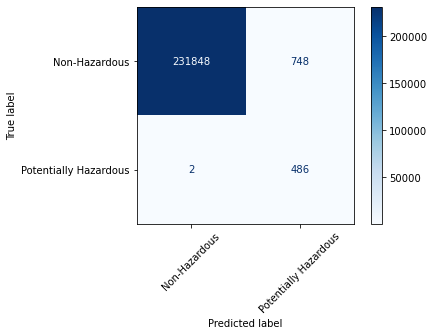

In [14]:
plot_confusion_matrix(log_pipe, X_test_logit, y_test, cmap=plt.cm.Blues, 
                      display_labels=['Non-Hazardous', 'Potentially Hazardous'], xticks_rotation=45.0);

## Iteration 2

#### Important features of baseline model
Outliers will be removed from features that have the highest weights.

In [15]:
coef = log_pipe.steps[1][1].coef_
coef[0]

array([-2.75430704e+00, -5.43653653e+00, -7.78820632e-01, -1.32102690e+00,
        2.33771951e+00,  6.54867959e-03, -3.39488698e+00, -1.44150963e+00,
        7.15747971e-02, -6.58501564e-02, -2.76793872e-02,  5.85260895e-02,
       -3.35830715e+00, -4.22793847e-02,  1.43341066e-01, -3.88102488e-01,
       -8.93861627e-02, -8.93861627e-02, -9.25093889e+01, -9.25093889e+01,
       -5.54324941e+00,  4.25526966e-02, -3.83318327e-01,  1.16895459e+00,
        5.63493249e-01,  1.60979975e-01,  1.62030876e-01,  3.89900452e-02,
       -8.26688020e-01,  1.62648465e-01,  7.37491572e-02,  9.84660422e-02,
       -2.79944830e+00, -1.47770569e+01,  1.26272800e-01, -5.11451468e+00,
       -3.75233068e+00, -3.67205637e-01,  9.58664865e-01,  4.34974720e+00,
       -2.93320930e+00, -3.41215235e+00,  2.73904900e+00])

In [16]:
coef_df = pd.DataFrame(zip(X_train_logit.columns, np.transpose(coef[0])), columns=['features', 'coef'])
coef_df.head()

,features,coef
0,neo,-2.754307
1,H,-5.436537
2,epoch,-0.778821
3,epoch_mjd,-1.321027
4,epoch_cal,2.337720


In [17]:
coef_sorted = coef_df.iloc[coef_df['coef'].abs().argsort()[::-1]]
coef_sorted

,features,coef
18,moid,-92.509389
19,moid_ld,-92.509389
33,class_APO,-14.777057
20,sigma_e,-5.543249
1,H,-5.436537
35,class_ATE,-5.114515
39,class_MBA,4.349747
36,class_CEN,-3.752331
41,class_OMB,-3.412152
6,a,-3.394887


#### Remove outliers

In [18]:
top = coef_sorted.iloc[:20, 0].to_list()
top

['moid',
 'moid_ld',
 'class_APO',
 'sigma_e',
 'H',
 'class_ATE',
 'class_MBA',
 'class_CEN',
 'class_OMB',
 'a',
 'ad',
 'class_MCA',
 'class_AMO',
 'neo',
 'class_TJN',
 'epoch_cal',
 'q',
 'epoch_mjd',
 'sigma_i',
 'class_IMB']

<AxesSubplot:xlabel='moid_ld', ylabel='Count'>

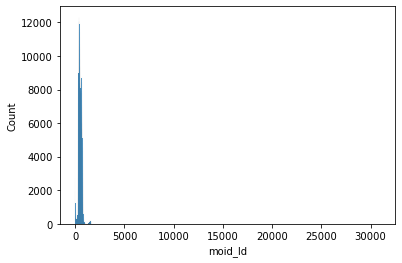

In [20]:
sns.histplot(x=df_cleaned['moid_ld'], data=df_cleaned)

In [21]:
for i in range(90, 101):
    q = i/100
    print('{} percentile: {}'.format(q, df_cleaned['moid_ld'].quantile(q=q)))

0.9 percentile: 713.2902345
0.91 percentile: 721.3888622000002
0.92 percentile: 729.8221761
0.93 percentile: 739.1350142000001
0.94 percentile: 749.1872753
0.95 percentile: 760.4588060099998
0.96 percentile: 774.096645988
0.97 percentile: 791.7741484000002
0.98 percentile: 823.2164380439997
0.99 percentile: 1465.7542433660003
1.0 percentile: 30929.908422000004


In [22]:
df_no_fliers = df_cleaned[df_cleaned['moid_ld'] <= 1400]

<AxesSubplot:xlabel='moid_ld', ylabel='Count'>

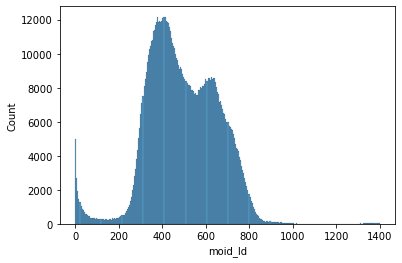

In [23]:
sns.histplot(x=df_no_fliers['moid_ld'], data=df_no_fliers)

In [24]:
for i in range(90, 101):
    q = i/100
    print('{} percentile: {}'.format(q, df_no_fliers['H'].quantile(q=q)))

0.9 percentile: 18.503
0.91 percentile: 18.6
0.92 percentile: 18.7
0.93 percentile: 18.8
0.94 percentile: 18.926
0.95 percentile: 19.1
0.96 percentile: 19.3
0.97 percentile: 19.678
0.98 percentile: 20.7
0.99 percentile: 23.9
1.0 percentile: 33.2


In [25]:
for i in range(90, 101):
    q = i/100
    print('{} percentile: {}'.format(q, df_no_fliers['a'].quantile(q=q)))

0.9 percentile: 3.137504811878804
0.91 percentile: 3.1456752689627785
0.92 percentile: 3.1538579175794847
0.93 percentile: 3.161942623963375
0.94 percentile: 3.169504698189642
0.95 percentile: 3.1780513372391166
0.96 percentile: 3.188635074591071
0.97 percentile: 3.2016359950394575
0.98 percentile: 3.2198620240993794
0.99 percentile: 3.3427507957795735
1.0 percentile: 8850.823836220028


In [26]:
df_no_fliers[df_no_fliers['a'] > 50]

,neo,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,...,class_AST,class_ATE,class_CEN,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
65406,0,0,12.300,2459000.5,59000,20200531.0,0.954279,53.711349,2.455753,119.099794,...,0,0,0,0,0,0,0,0,0,1
545693,0,0,13.900,2459000.5,59000,20200531.0,0.990378,258.236026,2.484772,30.052735,...,0,0,0,0,0,0,0,0,0,1
547621,0,0,14.000,2459000.5,59000,20200531.0,0.955952,52.560568,2.315170,68.267963,...,0,0,0,0,0,0,0,0,0,1
548391,0,0,10.500,2459000.5,59000,20200531.0,0.963222,90.594428,3.331839,45.632173,...,0,0,0,0,0,0,0,0,0,1
558466,0,0,15.300,2459000.5,59000,20200531.0,0.995107,547.968271,2.681115,58.312318,...,0,0,0,0,0,0,0,0,0,1
570912,0,0,15.300,2459000.5,59000,20200531.0,0.976241,99.420445,2.362180,165.554096,...,0,0,0,0,0,0,0,0,0,1
579052,0,0,13.700,2459000.5,59000,20200531.0,0.951859,63.065588,3.036066,67.511706,...,0,0,0,0,0,0,0,0,0,1
586407,0,0,14.100,2459000.5,59000,20200531.0,0.994971,815.300107,4.099865,112.258050,...,0,0,0,0,0,0,0,0,0,1
608821,0,0,14.912,2459000.5,59000,20200531.0,0.994286,467.703829,2.672544,76.528978,...,0,0,0,0,0,0,0,0,0,1
661281,0,0,14.900,2459000.5,59000,20200531.0,0.941033,62.903042,3.709228,105.211325,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df_no_fliers = df_no_fliers[df_no_fliers['a'] <= 50]

In [28]:
for i in range(90, 101):
    q = i/100
    print('{} percentile: {}'.format(q, df_no_fliers['ad'].quantile(q=q)))

0.9 percentile: 3.641633351346189
0.91 percentile: 3.6688832051345863
0.92 percentile: 3.6982889831120067
0.93 percentile: 3.7307385573753167
0.94 percentile: 3.767001220398261
0.95 percentile: 3.808535392293984
0.96 percentile: 3.8557661788597186
0.97 percentile: 3.917206662808669
0.98 percentile: 4.014537203875679
0.99 percentile: 4.29638433415904
1.0 percentile: 93.72990930613251


In [29]:
df_no_fliers[df_no_fliers['ad'] > 20].count()

neo          74
pha          74
H            74
epoch        74
epoch_mjd    74
epoch_cal    74
e            74
a            74
q            74
i            74
om           74
w            74
ma           74
ad           74
n            74
tp           74
tp_cal       74
per          74
per_y        74
moid         74
moid_ld      74
sigma_e      74
sigma_a      74
sigma_q      74
sigma_i      74
sigma_om     74
sigma_w      74
sigma_ma     74
sigma_ad     74
sigma_n      74
sigma_tp     74
sigma_per    74
rms          74
class_AMO    74
class_APO    74
class_AST    74
class_ATE    74
class_CEN    74
class_IEO    74
class_IMB    74
class_MBA    74
class_MCA    74
class_OMB    74
class_TJN    74
class_TNO    74
dtype: int64

In [30]:
df_no_fliers = df_no_fliers[df_no_fliers['ad'] <= 20]

In [31]:
for i in range(90, 101):
    q = i/100
    print('{} percentile: {}'.format(q, df_no_fliers['epoch_cal'].quantile(q=q)))

0.9 percentile: 20200531.0
0.91 percentile: 20200531.0
0.92 percentile: 20200531.0
0.93 percentile: 20200531.0
0.94 percentile: 20200531.0
0.95 percentile: 20200531.0
0.96 percentile: 20200531.0
0.97 percentile: 20200531.0
0.98 percentile: 20200531.0
0.99 percentile: 20200531.0
1.0 percentile: 20200531.0


In [32]:
for i in range(90, 101):
    q = i/100
    print('{} percentile: {}'.format(q, df_no_fliers['tp'].quantile(q=q)))

0.9 percentile: 2459617.208064441
0.91 percentile: 2459636.95749063
0.92 percentile: 2459657.527962704
0.93 percentile: 2459680.955364708
0.94 percentile: 2459707.446765461
0.95 percentile: 2459735.3205843735
0.96 percentile: 2459766.1696941904
0.97 percentile: 2459804.595133252
0.98 percentile: 2459858.4804402855
0.99 percentile: 2459930.309236824
1.0 percentile: 2464852.8332943683


In [33]:
for i in range(90, 101):
    q = i/100
    print('{} percentile: {}'.format(q, df_no_fliers['q'].quantile(q=q)))

0.9 percentile: 2.79853431224254
0.91 percentile: 2.8181881397961766
0.92 percentile: 2.838484815050618
0.93 percentile: 2.8597483744264274
0.94 percentile: 2.8829397479652257
0.95 percentile: 2.9083376709869504
0.96 percentile: 2.9364175876479077
0.97 percentile: 2.9695171128663094
0.98 percentile: 3.0131733946377546
0.99 percentile: 3.084404840557823
1.0 percentile: 4.612030525950536


The most outliers were removed based on `moid_ld`, `a`, and `ad`.

In [35]:
df_no_fliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921430 entries, 0 to 932334
Data columns (total 45 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        921430 non-null  int64  
 1   pha        921430 non-null  int64  
 2   H          921430 non-null  float64
 3   epoch      921430 non-null  float64
 4   epoch_mjd  921430 non-null  int64  
 5   epoch_cal  921430 non-null  float64
 6   e          921430 non-null  float64
 7   a          921430 non-null  float64
 8   q          921430 non-null  float64
 9   i          921430 non-null  float64
 10  om         921430 non-null  float64
 11  w          921430 non-null  float64
 12  ma         921430 non-null  float64
 13  ad         921430 non-null  float64
 14  n          921430 non-null  float64
 15  tp         921430 non-null  float64
 16  tp_cal     921430 non-null  float64
 17  per        921430 non-null  float64
 18  per_y      921430 non-null  float64
 19  moid       921430 non-n

In [63]:
y = df_no_fliers['pha']
X = df_no_fliers.drop('pha', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
# Previous class distribution
print('Original class distribution: \n')
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)
# Synthetic class distribution:
print('----------------------------')
print('Synthetic sample class distribution: \n')
print(y_train_resampled.value_counts())

Original class distribution: 

0    689548
1      1524
Name: pha, dtype: int64
----------------------------
Synthetic sample class distribution: 

1    689548
0    689548
Name: pha, dtype: int64


In [38]:
# Drop last dummy variable for logistic regression

X_train_logit = X_train_resampled.drop('class_TNO', axis=1)
X_test_logit = X_test.drop('class_TNO', axis=1)

In [39]:
log_pipe2 = Pipeline([('ss', StandardScaler()),
                     ('logreg', LogisticRegression(solver='liblinear', C=1e25, max_iter=1000))])
log_pipe2.fit(X_train_logit, y_train_resampled)
y_pred = log_pipe2.predict(X_test_logit)

In [40]:
print('Train Report')
print(classification_report(y_train_resampled, log_pipe2.predict(X_train_logit)))
print('\n')
print('Test Report')
print(classification_report(y_test, y_pred))

Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    689548
           1       1.00      1.00      1.00    689548

    accuracy                           1.00   1379096
   macro avg       1.00      1.00      1.00   1379096
weighted avg       1.00      1.00      1.00   1379096



Test Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229817
           1       0.41      1.00      0.59       541

    accuracy                           1.00    230358
   macro avg       0.71      1.00      0.79    230358
weighted avg       1.00      1.00      1.00    230358



With the removal of outliers, performance on the test data has improved compared to the previous iteration. However, the model is still overfit to the training data.

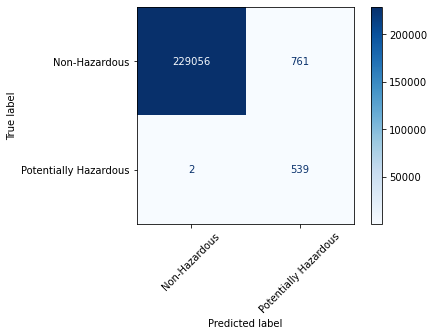

In [41]:
plot_confusion_matrix(log_pipe2, X_test_logit, y_test, cmap=plt.cm.Blues, 
                      display_labels=['Non-Hazardous', 'Potentially Hazardous'], xticks_rotation=45.0);

## Iteration 3: No SMOTE, no outliers
This iteration will address overfitting by using the `class_weight` hyperparameter rather than SMOTE.

In [64]:
X_train = X_train.drop('class_TNO', axis=1)
X_test = X_test.drop('class_TNO', axis=1)

In [44]:
# handle class imbalance in class_weight parameter instead of using SMOTE

log_pipe3 = Pipeline([('ss', StandardScaler()),
                     ('logreg', LogisticRegression(solver='liblinear', C=1e25, max_iter=1000, class_weight={0:1, 1:200}))])
log_pipe3.fit(X_train, y_train)

In [65]:
y_pred = log_pipe3.predict(X_test)

In [66]:
print('Train Report')
print(classification_report(y_train, log_pipe3.predict(X_train)))
print('\n')
print('Test Report')
print(classification_report(y_test, y_pred))

Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    689548
           1       0.41      1.00      0.59      1524

    accuracy                           1.00    691072
   macro avg       0.71      1.00      0.79    691072
weighted avg       1.00      1.00      1.00    691072



Test Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229817
           1       0.43      1.00      0.60       541

    accuracy                           1.00    230358
   macro avg       0.71      1.00      0.80    230358
weighted avg       1.00      1.00      1.00    230358



The model is no longer overfit to the training data, as the test and train reports have similar scores. It is possible that the minority class samples had enough variation that SMOTE generated synthetic minority samples that were not real neighbors. 

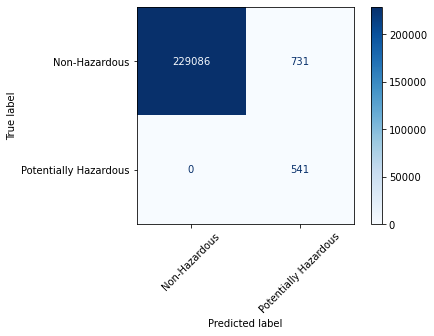

In [67]:
plot_confusion_matrix(log_pipe3, X_test, y_test, cmap=plt.cm.Blues, 
                      display_labels=['Non-Hazardous', 'Potentially Hazardous'], xticks_rotation=45.0);

In [46]:
df_no_fliers.to_csv('data/data_no_fliers.csv')

## Iterations 4 & 5: Addressing Multicolinearity

Iteration 4 will explore the results of removing features on the basis of multicolinearity. A new list of important features will be used to remove outliers for an iteration (Iteration 5) that can be compared with Iteration 3, which retains all features. 

#### Iteration 4: With outliers, less multicolinearity

In [47]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound))]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

In [48]:
corr = corrFilter(df_cleaned, .94)
corr

q          class_TNO    0.945561
class_TNO  moid_ld      0.946813
           moid         0.946813
a          per          0.981604
per_y      a            0.981604
per        ad           0.983439
per_y      ad           0.983439
sigma_a    sigma_ad     0.996709
tp         tp_cal       0.998229
sigma_tp   sigma_w      0.998972
           sigma_ma     0.998973
ad         a            0.999560
epoch_cal  epoch_mjd    0.999575
           epoch        0.999575
moid_ld    q            0.999734
moid       q            0.999734
sigma_w    sigma_ma     1.000000
moid_ld    moid         1.000000
sigma_w    sigma_w      1.000000
per        per_y        1.000000
epoch_mjd  epoch        1.000000
neo        pha               NaN
dtype: float64

In [49]:
type(corrFilter(df_cleaned, .94))

pandas.core.series.Series

In [50]:
# Remove some highly correlated features. 

to_drop = ['epoch_mjd', 'per_y', 'moid', 'sigma_ma', 'q', 'epoch_cal', 'ad', 'sigma_w', 'tp_cal', 'sigma_ad']
df_cleaned2 = df_cleaned.drop(to_drop, axis=1)

In [51]:
X = df_cleaned2.drop('pha', axis=1)
y = df_cleaned2['pha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = X_train.drop('class_TNO', axis=1)
X_test = X_test.drop('class_TNO', axis=1)

In [52]:
log_pipe4 = Pipeline([('ss', StandardScaler()),
                     ('logreg', LogisticRegression(solver='liblinear', C=1e25, max_iter=1000, class_weight={0:1, 1:200}))])
log_pipe4.fit(X_train, y_train)
y_pred = log_pipe4.predict(X_test)

In [53]:
print('Train Report')
print(classification_report(y_train, log_pipe4.predict(X_train)))
print('\n')
print('Test Report')
print(classification_report(y_test, y_pred))

Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    697673
           1       0.42      1.00      0.59      1578

    accuracy                           1.00    699251
   macro avg       0.71      1.00      0.80    699251
weighted avg       1.00      1.00      1.00    699251



Test Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    232596
           1       0.39      1.00      0.56       488

    accuracy                           1.00    233084
   macro avg       0.69      1.00      0.78    233084
weighted avg       1.00      1.00      1.00    233084



In [54]:
# Find features with the largest weights

coef = log_pipe4.steps[1][1].coef_
coef[0]

array([-3.54723253e+00, -4.85789832e+00,  1.56955003e-01,  7.36451578e-02,
       -2.93767604e+01,  1.25427351e-01, -6.50956560e-02, -2.28792891e-02,
        6.70442569e-02, -9.42148482e-02, -1.98761018e-01, -3.20969372e-01,
       -3.16982152e+02, -3.60264006e+00,  2.56053590e-01,  5.52555044e-01,
        4.34572721e+00, -6.33564483e+00, -4.04583149e+00,  7.38074848e-01,
        3.48618071e-01,  8.13635438e-02, -2.12988924e+00, -2.63739432e+00,
        3.80023383e-01, -9.53309061e-01, -6.60216933e-02, -1.01767824e-01,
        1.97715077e+00,  4.55573191e+00, -4.84371605e+00, -6.20301473e+00,
        1.10900365e+01])

In [55]:
coef_df = pd.DataFrame(zip(X_train.columns, np.transpose(coef[0])), columns=['features', 'coef'])
coef_df.head()

,features,coef
0,neo,-3.547233
1,H,-4.857898
2,epoch,0.156955
3,e,0.073645
4,a,-29.376760


In [56]:
coef_sorted = coef_df.iloc[coef_df['coef'].abs().argsort()[::-1]]
coef_sorted

,features,coef
12,moid_ld,-316.982152
4,a,-29.376760
32,class_TJN,11.090037
17,sigma_om,-6.335645
31,class_OMB,-6.203015
1,H,-4.857898
30,class_MCA,-4.843716
29,class_MBA,4.555732
16,sigma_i,4.345727
18,sigma_n,-4.045831


Remove outliers based on new list of important features:

In [57]:
for i in range(90, 101):
    q = i/100
    print('{} percentile: {}'.format(q, df_cleaned2['moid_ld'].quantile(q=q)))

0.9 percentile: 713.2902345
0.91 percentile: 721.3888622000002
0.92 percentile: 729.8221761
0.93 percentile: 739.1350142000001
0.94 percentile: 749.1872753
0.95 percentile: 760.4588060099998
0.96 percentile: 774.096645988
0.97 percentile: 791.7741484000002
0.98 percentile: 823.2164380439997
0.99 percentile: 1465.7542433660003
1.0 percentile: 30929.908422000004


In [58]:
for i in range(90, 101):
    q = i/100
    print('{} percentile: {}'.format(q, df_cleaned2['a'].quantile(q=q)))

0.9 percentile: 3.1461263054346817
0.91 percentile: 3.154391291029324
0.92 percentile: 3.162582433918047
0.93 percentile: 3.17019134970903
0.94 percentile: 3.178982879839905
0.95 percentile: 3.1899532879771173
0.96 percentile: 3.2034328321728465
0.97 percentile: 3.22318831974346
0.98 percentile: 3.4109147143645298
0.99 percentile: 5.178501664039422
1.0 percentile: 33488.895954563486


In [59]:
df_no_fliers2 = df_cleaned2[df_cleaned2['moid_ld'] <= 1400]
df_no_fliers2 = df_no_fliers2[df_no_fliers2['a'] <= 50]

#### Iteration 5: No outliers, less multicolinearity

In [60]:
X = df_no_fliers2.drop('pha', axis=1)
y = df_no_fliers2['pha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = X_train.drop('class_TNO', axis=1)
X_test = X_test.drop('class_TNO', axis=1)

In [61]:
log_pipe5 = Pipeline([('ss', StandardScaler()),
                     ('logreg', LogisticRegression(solver='liblinear', C=1e25, max_iter=1000, class_weight={0:1, 1:200}))])
log_pipe5.fit(X_train, y_train)
y_pred = log_pipe5.predict(X_test)

In [62]:
print('Train Report')
print(classification_report(y_train, log_pipe5.predict(X_train)))
print('\n')
print('Test Report')
print(classification_report(y_test, y_pred))

Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    689582
           1       0.41      1.00      0.58      1546

    accuracy                           1.00    691128
   macro avg       0.71      1.00      0.79    691128
weighted avg       1.00      1.00      1.00    691128



Test Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229856
           1       0.43      1.00      0.60       520

    accuracy                           1.00    230376
   macro avg       0.71      1.00      0.80    230376
weighted avg       1.00      1.00      1.00    230376



Removing features that demonstrate multicolinearity does not appear to improve model performance. I will take Iteration 3 as my best performing model. After comparing Iteration 3 to the baseline desision tree, it seems that logistic regression will not be the best model with this dataset and I will proceed with other modeling techniques.